# Linear Regression Analysis on Salary Data

By Yashvi Sharma

## Introduction

The goal of this project is to explore the relationship between various factors, such as years of experience, age, and categorical data, and their impact on salary. The project aims to use linear regression to predict salary based on these factors and evaluate the performance of the model.

## Data Description

The dataset used in this analysis contains information about employees, including age, years of experience, gender, education level, job title, and salary. Each row represents a different employee, while the columns represent their attributes.

1. Age: Age of the employee in years.
2. Years of Experience: Number of years the employee has worked.
3. Salary: The annual salary in US dollars.
4. Gender: Gender of the employee (male or female).
5. Education Level: Highest level of education attained by the employee (high school, bachelor's degree, master's degree, or PhD).
6. Job Title: The employee's job title (e.g., manager, analyst, engineer, etc.).

## Data Exploration

### Import Libraries 

1. **Pandas:** Used for data manipulation and analysis, like loading, cleaning, and transforming data.
2. **Seaborn:** Creates statistical visualizations, providing easy-to-use plotting functions with appealing aesthetics.
3. **Matplotlib:** Provides a robust foundation for plotting and allows for customization of graphs.
5. **Scikit-Learn:** Offers tools for machine learning, including data splitting, model building, and evaluation metrics like Mean Squared Error (MSE) and R-squared (R²).

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Loading Data

In [3]:
data = pd.read_csv("Salary Data.csv")

### Data Exploration

The dataset was loaded, and basic statistics were examined. Here's a summary of the data:

In [6]:
data.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


**data.info()** Displays a concise summary of a DataFrame. It shows information like the number of rows, column names, data types, non-null counts, and memory usage

In [9]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


## Handling Missing Values

### Checking sum of null elements present in each columns

1. **.isnull()** checks the number of null elements present 
2. **.sum()** adds the number of null elements

In [14]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

### Removing null values from the database

1. **data.dropna()**: This function removes rows or columns with missing (NaN) values from a DataFrame.
2. ***inplace=True:*** This parameter tells pandas to perform the operation "in place," meaning that the changes will be applied directly to the DataFrame without needing to assign the result to a new variable.

In [16]:
data.dropna(inplace=True)

In [17]:
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

## Data Transformation

1. **pd.get_dummies()**: This function in pandas creates "dummy variables"from categorical data. 
It transforms each category in a categorical column into a new binary (0 or 1) column, indicating the presence or absence of that category.
2. In this context, I've transformed categorical variables into numerical format for further analysis, especially for machine learning tasks of linear regression.

In [ ]:
data = pd.get_dummies(data, columns=['Gender', 'Education Level', 'Job Title'], drop_first=True)

1. ***columns=['Gender', 'Education Level', 'Job Title']:*** Specifies the columns to transform.
2. ***drop_first=True:*** Drops the first category to avoid multicollinearity in regression models.

In [58]:
data.head()

,Age,Years of Experience,Salary,Gender_Male,Education Level_Master's,Education Level_PhD,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Business Analyst,Job Title_Business Development Manager,...,Job Title_Supply Chain Manager,Job Title_Technical Recruiter,Job Title_Technical Support Specialist,Job Title_Technical Writer,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer
0,32.0,5.0,90000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28.0,3.0,65000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45.0,15.0,150000.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,36.0,7.0,60000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,52.0,20.0,200000.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visualisation

### Age Distribution:

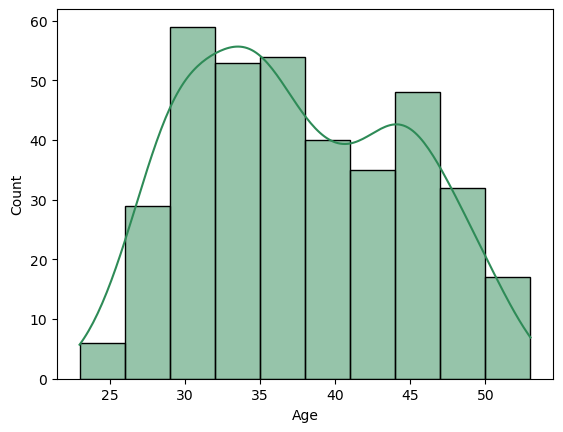

In [47]:
sns.histplot(data['Age'], kde=True, color="seagreen")  
plt.show()

### Salary Distribution:

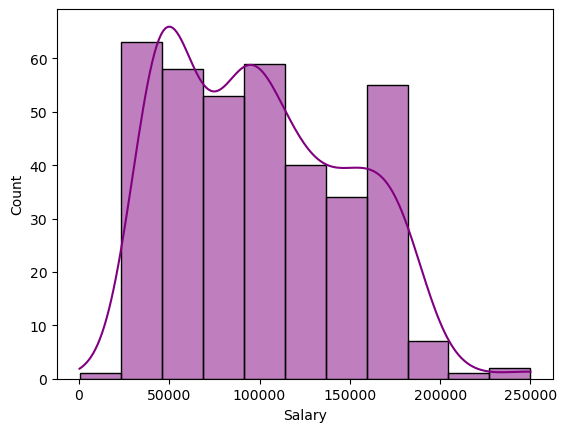

In [48]:
sns.histplot(data['Salary'], kde=True, color="purple") 
plt.show()

### Years of Experience vs. Salary

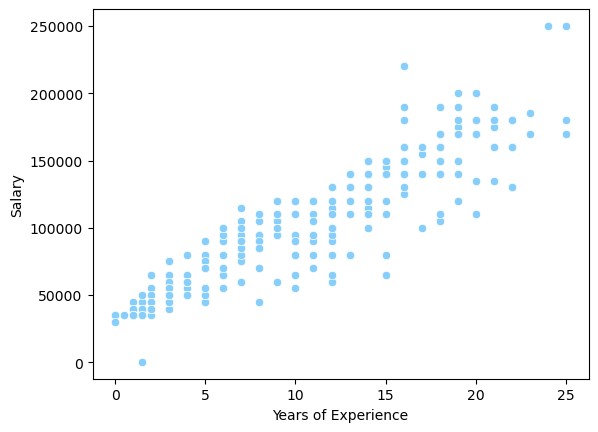

In [52]:
sns.scatterplot(x='Years of Experience', y='Salary', data=data, color="lightskyblue")
plt.show()

## Linear Regression

### Model Building

1. **X:** It refers to features
2. **Y:** It refers to the target, which is the like target outcome you want to predict
3. **train_test_split:** Splits the data into two parts: a training set to build the model and a testing set to evaluate the model's performance.
4. *test_size=0.2:* Indicates that 20% of the data will be used for testing, while the remaining 80% is for training.
5. *random_state=42:* Ensures the split is reproducible. The same random state always yields the same data split.
6. **X_train, y_train:** These sets are used to train the model.
7. **X_test, y_test:** These sets are used to test and validate the model's accuracy after training.

In [34]:
X = data[['Years of Experience']] 
y = data['Salary']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training 

1. **model = LinearRegression()**: Creates an instance of the Linear Regression model from scikit-learn.
2. **model.fit(X_train, y_train):** The model learns the relationship between the **X** and **Y** during this step.

In [35]:
model = LinearRegression() 
model.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

1. **y_pred = model.predict(X_test)**: Uses the trained model to make predictions on the test set (X_test).
2. **mse = mean_squared_error(y_test, y_pred):** Calculates the mean squared error between the actual test values (y_test)
3. **r2 = r2_score(y_test, y_pred):** Shows the correlation between X and Y. *An R² closer to 1 indicates a strong correlation.*

In [36]:
y_pred = model.predict(X_test)

In [37]:
y_pred

array([174795.47129497,  99746.97937009, 140682.52042002,  72456.61867014,
       147505.11059501, 154327.70077   , 181618.06146996,  99746.97937009,
        51988.84814517,  92924.3891951 , 120214.74989506, 174795.47129497,
        45166.25797018,  92924.3891951 , 127037.34007005,  51988.84814517,
        65634.02849515,  41754.96288269,  79279.20884513,  86101.79902012,
        99746.97937009,  92924.3891951 , 140682.52042002,  65634.02849515,
        72456.61867014,  58811.43832016, 154327.70077   ,  45166.25797018,
       120214.74989506, 161150.29094499,  51988.84814517, 127037.34007005,
        51988.84814517, 133859.93024504,  99746.97937009,  34932.3727077 ,
       174795.47129497,  45166.25797018, 154327.70077   ,  58811.43832016,
        45166.25797018,  92924.3891951 , 202085.83199492, 161150.29094499,
        45166.25797018, 140682.52042002, 106569.56954508,  45166.25797018,
        45166.25797018,  45166.25797018, 161150.29094499,  86101.79902012,
       120214.74989506, 1

In [38]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [39]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 241834883.8999349
R-squared: 0.8991338517367767


## Visualisation of Regression Fit 

1. X-axis represents the independent variable, 'Years of Experience'.
2. Y-axis represents the dependent variable, 'Salary'.
3. Scatter Points (in coral) indicate the actual salary values from the test set.
4. Regression Line (in maroon) represents the predicted relationship based on our linear regression model.

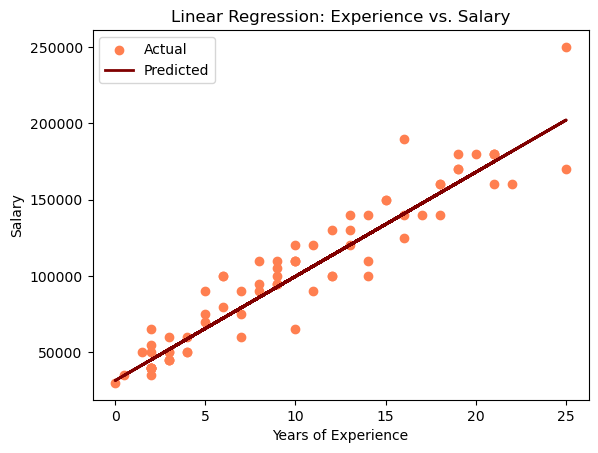

In [60]:
plt.scatter(X_test, y_test, color='coral', label='Actual')  # Scatter plot of actual values
plt.plot(X_test, y_pred, color='maroon', linewidth=2, label='Predicted')  # Linear regression line
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Experience vs. Salary')
plt.legend()
plt.show()

### Plot Analysis

1. The regression line has a positive slope, indicating that **salary tends to increase with years of experience.**
2. The scatter points are relatively close to the regression line, suggesting that the **linear model provides a reasonable approximation for predicting salary.**
3. There are some deviations, with a few scatter points lying farther from the regression line, indicating potential outliers or factors not captured by the model.

## Conclusion

The linear regression project explored the relationship between years of experience and salary. After cleaning and transforming the dataset, the linear regression model was trained and evaluated.

The model showed good predictive performance, with low Mean Squared Error (MSE) and a high R-squared (R²), indicating that years of experience is a significant factor in determining salary. A scatter plot with a regression line visually confirmed this positive correlation.

Further improvements could involve adding more features, addressing outliers, or exploring more complex models. This project demonstrated the effectiveness of linear regression in predicting salary and provided useful insights into employee compensation